<a href="https://colab.research.google.com/github/Eminent01/test-live-coding/blob/master/Ademola_Abiodun_Saheed_LogRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb)

# Logistic Regression Implementation

# Instructions:
1. Save a copy of this notebook in your drive;
2. Name it by: `Your_fullname_LogRegression.ipynb`
3. Close the original notebook
4. Start typing your codes.

`Note:` Discuss with your neighbors.

# Part 1: Data preparation

## Import Dataset Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Question 0: Import the dataset Dataset

In [3]:
##### WRITE YOUR CODE HERE #####
path= '/content/diabetes.csv'
data= pd.read_csv(path)
#### END CODE ####

Question 1: Print the first five rows of the Dataset

In [4]:
##### WRITE YOUR CODE HERE #####
data.head(5)
#### END CODE ####

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Question 2: Check the types of your variables/features

In [9]:
##### WRITE YOUR CODE HERE #####
data.dtypes
#### END CODE ####

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

Question 3: Describe your dataset

In [10]:
##### WRITE YOUR CODE HERE #####
data.describe()
#### END CODE ####

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Question 4: write a function that scale your features.
`Hint:` $x'= \dfrac{x-\mu}{\sigma}$ 
where $\mu$ is the mean and $\sigma$ the standard deviation of $x$.

In [11]:
##### WRITE YOUR CODE HERE #####
def scale(x):
  num = (x - np.mean(x))
  den = np.std(x)
  scale = num / den
  return scale
#### END CODE ####

Question 5: Scale your features, except the target. 

In [17]:
##### WRITE YOUR CODE HERE #####
data.iloc[:, :-1] = scale(data.iloc[:,0:-1])
data.head(3)
#### END CODE #### 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1


Question 6: Write a function that split your (x,y) to (x_train, y_train) and (x_test, y_test).
`Note:` This function must return an arrays.

In [18]:
##### WRITE YOUR CODE HERE #####
def split_data(df, train_percent= 0.8):
  np.random.seed(2)
  perm = np.random.permutation(df.index)

  n= len(df)
  train_index = int(train_percent * n)

  train = df.iloc[perm[:train_index]]
  test = df.iloc[perm[train_index:]]

  x_train, x_test, y_train, y_test= train.iloc[:, :-1], test.iloc[:, :-1], train.iloc[:, -1], test.iloc[:, -1]
  return x_train.values, x_test.values, y_train.values, y_test.values
#### END CODE ####

In [19]:
x_train, x_test, y_train, y_test= split_data(data) 
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((614, 8), (614,), (154, 8), (154,))

# Part 2: Logistic Regression without Regularization.

## Recaps:
1. Logistic/sigmoid function of $z$:
\begin{equation}
g(z)= \dfrac{1}{1+ exp(-z)}
\end{equation}
where $z= x^t \theta$ and $x, y \in \mathbb{R}^d$.
2. Derivative of Logistic/sigmoid function with respective to $z$:
\begin{equation}
dg(z)= g(z)(1-g(z))
\end{equation}
3. Cross-entropy loss:
\begin{equation}
l(\theta)= -\sum_{i= 1}^{N} \left(y_{true} \times \log y_{pred} + (1-y_{true}) \times \log (1-y_{pred}) \right)
\end{equation}
where $y_{true}= g(z)$, $z= x^t \theta$ and $y_{true}$ is the ground-truth for a given $x$.

4. Derivative of Cross-entropy loss with respective to $\theta$:
\begin{equation}
dl(\theta)= -\sum_{i= 1}^{N} x^t\left(y_{true} -y_{ped} \right)
\end{equation}
5. Apply Batch gradient descent to update $\theta$.

Question: Create a class called LogReg. See the description in the below cells.


In [151]:
from numpy.ma.core import log
class logistic_regression:
  def __init__(self,x_test,y_test,num_iters= 100, threshold= 0.5, tolerance= 1e-10, lr= 0.00001):
    ##### WRITE YOUR CODE HERE #####
    self.num_iters = num_iters
    self.threshold = threshold
    self.tolerance = tolerance
    self.lr = lr
    self.theta = None
    self.cost_history = []
    self.cost_history_test = []
    self.x_test = x_test
    self.y_test =y_test
    #### END CODE ####

  def add_ones(self, x):
    ##### WRITE YOUR CODE HERE #####
    ones = np.ones((len(x),1))
    x_new =np.concatenate([x,ones], axis =1)
    return x_new
    # return np.hstack([np.ones(x[0],1), x])
    #### END CODE ####

  def sigmoid(self, x, theta):
    ##### WRITE YOUR CODE HERE #####
    # z= self.add_ones(x) @ self.theta
    z = x@theta
    y_pred = 1/(1 + (np.exp(-z)))
    return y_pred
    #### END CODE ####

  def cross_entropy(self, x, y_true):
    ##### WRITE YOUR CODE HERE #####
    n = len(x) # Length of x
    # x_new = self.add_ones(x)
    y_pred =self.sigmoid(x, self.theta)
    Cost = - np.sum(y_true.reshape(-1,1)*np.log(y_pred.reshape(-1,1))+(1-y_true.reshape(-1,1))*np.log(1-y_pred.reshape(-1,1)))
        
    return Cost/n
    #### END CODE ####

  def fit(self, x,y):
       ##### WRITE YOUR CODE HERE #####
    # n = len(x)
    x= self.add_ones(x) # Add ones to x
    y= y.reshape(-1,1)# reshape y. This is optional, do it if needed
    # self.x_test=self.add_ones(self.x_test)
    # self.y_test=self.y_test.reshape(-1,1)
    self.theta= np.zeros((x.shape[1],1)) # Initialize theta to zeros vector >>> (x.shape[1])
    current_iter= 1
    norm= 1

    while (norm >= self.tolerance and current_iter < self.num_iters):
      theta_old = self.theta.copy() # Get old theta

      # make predictions
      y_pred= self.sigmoid(x, self.theta) # using sigmoid function 

      # Gradient of cross-entropy
      grad= -x.T @(y.reshape(-1,1) - y_pred.reshape(-1,1))
      grad= grad.reshape(-1,1) # Reshape, if it is needed

      # update rules
      self.theta -= grad*self.lr
      # Compute the training loss
      loss=self.cross_entropy(x,y.reshape(-1,1))
      self.cost_history.append(loss)
      loss_test=self.cross_entropy(self.add_ones(x_test),self.y_test.reshape(-1,1))
      self.cost_history_test.append(loss_test)

      # Convergence criteria:
      if current_iter%100 == 0:
        print(f'cost for {current_iter} iteration : {self.cross_entropy(x, y.reshape(-1,1))}')
      norm = np.linalg.norm(theta_old - self.theta)
      current_iter += 1
    #### END CODE ####
  def predict_proba(self, x):
    x=self.add_ones(x)
    y_pred_proba= self.sigmoid(x, self.theta) # Get probability of x
    # result= np.where(proba<0.5,0,1)  # Convert proba to 0 or 1. hint: list comprehension
    return  y_pred_proba

  def predict(self, x):
    # x= self.add_ones(x) # Apply add ones to x
    proba= self.predict_proba(x) # Predict proba with sigmoid
    result= np.where(proba<0.5,0,1)
    return result
  
  
  
    
  
  def plot(self):
    ##### WRITE YOUR CODE HERE #####
    plt.plot(self.cost_history, label ="Train loss")
    plt.plot(self.cost_history_test, label ="Test loss")
    plt.legend()
    #### END CODE ####

In [152]:
# Create a model by instanciating the class logistic_regression
model = logistic_regression(x_test,y_test,num_iters=1000)

In [153]:
%%time
model.fit(x_train, y_train)

cost for 100 iteration : 0.6361937545081013
cost for 200 iteration : 0.5987906607943532
cost for 300 iteration : 0.573069032437725
cost for 400 iteration : 0.554604670872057
cost for 500 iteration : 0.5408658963508798
cost for 600 iteration : 0.5303427167700745
cost for 700 iteration : 0.5220927387171681
cost for 800 iteration : 0.5155022467431672
cost for 900 iteration : 0.510156146914654
CPU times: user 211 ms, sys: 0 ns, total: 211 ms
Wall time: 213 ms


In [154]:
pred= model.predict(x_test)

In [155]:
pred

array([[0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
    

In [156]:
# Predict Proba
print(model.predict_proba(x_test))

[[0.16025509]
 [0.24732557]
 [0.26971162]
 [0.1404407 ]
 [0.63784795]
 [0.47669254]
 [0.3253941 ]
 [0.36953003]
 [0.11331528]
 [0.25928822]
 [0.12433376]
 [0.27719955]
 [0.71787639]
 [0.07772542]
 [0.61859457]
 [0.1498372 ]
 [0.47957186]
 [0.4694544 ]
 [0.42837492]
 [0.17063805]
 [0.33793304]
 [0.45267751]
 [0.48790548]
 [0.26508692]
 [0.36600101]
 [0.70548317]
 [0.23137025]
 [0.41098592]
 [0.4943786 ]
 [0.36885937]
 [0.09696373]
 [0.84997708]
 [0.17363527]
 [0.4220957 ]
 [0.18025303]
 [0.48925346]
 [0.60095935]
 [0.42613453]
 [0.2092969 ]
 [0.86916383]
 [0.18343433]
 [0.34811116]
 [0.64589125]
 [0.82606506]
 [0.29858036]
 [0.16365684]
 [0.39606789]
 [0.64239292]
 [0.4838621 ]
 [0.44189988]
 [0.35265847]
 [0.63761922]
 [0.6368145 ]
 [0.08939836]
 [0.52116661]
 [0.2654859 ]
 [0.38019911]
 [0.70541449]
 [0.2821648 ]
 [0.8590987 ]
 [0.8213161 ]
 [0.44413071]
 [0.24424611]
 [0.17105491]
 [0.2841314 ]
 [0.19234414]
 [0.14796941]
 [0.1590967 ]
 [0.43224811]
 [0.43583123]
 [0.57454285]
 [0.49

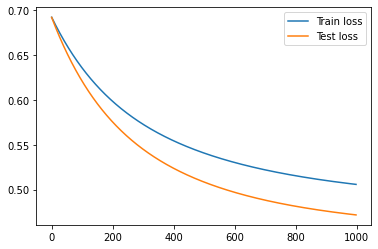

In [157]:
model.plot()

## Push your works to Githup Repo

Setps:
1. Fork the repo: `https://github.com/AMMI-2022/test-live-coding`
2. Clone in your colab;
3. Push
4. Make a pull request

Set your credential

In [ ]:
my_token= ""
my_repository= ""
username= ""
useremail= ""

Clone the repo

In [ ]:
! git clone https://github.com/{username}/{my_repository}.git

In [ ]:
! git remote -v

Copy data to test-live-coding folder

In [ ]:
!cp diabetes.csv /content/test-live-coding

In [ ]:
%cd /content/test-live-coding

In [ ]:
!git status

In [ ]:
!git config user.email useremail
!git config user.name username

In [ ]:
!git add .
!git commit -m "Add my files"

In [ ]:
!git status

In [ ]:
!git push -u origin master --force

# If you cannot push, use:

In [ ]:
!git remote rm origin

In [ ]:
!git remote add origin https://{my_token}@github.com/{username}/{my_repository}.git
!git remote -v

In [ ]:
!git push -u origin master --force

---



---



---

# Assignment

Just follow the class logistic_regression, try to implement Logistic regression with `l1`, `l2` and `l1-l2`. That we call respectively `Lasso (least absolute shrinkage and selection operator)`, `Ridge` and `ElasticNet`.
Given cross-entropy:
\begin{equation}
  l(θ)= -\sum_{i= 1}^{N} \left(y_{true} \times \log y_{pred} + (1-y_{true}) \times \log (1-y_{pred}) \right)
\end{equation}

1. l1-regularization (LASSO):

\begin{equation}
   l(θ) + λ\| \theta\|_1
\end{equation}


2. l2-regularization (Ridge):
\begin{equation}
   l(θ)+ λ\| \theta\|_2
\end{equation}

3. l1-l2-regularization (ElasticNet):
\begin{equation}
  l(θ) + λ_1\| \theta\|_1 + λ_2\| \theta\|_2
\end{equation}

`Note: please use mini-batch as learning algorithm`

In [ ]:
class logistic_regression_l1:
  pass

In [ ]:
class logistic_regression_l2:
  pass

In [ ]:
class logistic_regression_l1_l2:
  pass

# Concepts [Assignment]:
1. Why there is no close form for cross-entropy loss?
2. Why we need cross-entropy loss instead of mse?
3. Why is logistic regression a type of classification technique and not a regression?